### Caesar cypher, encrypting, decrypting, frequency analysis

The aim of this exercise is to get a better grasp of the Caesar cypher and the technique to crack it. The steps are the following:
* get a random paragraph to be encrypted
* generate a Caesar cypher for a random shifting value
* make the encryption
* make a letter frequency analysis on the encrypted text and compare it with the normal frequency of letters in english language
* generate an inverse key to decode the encrypted text back to the original one


***

First, I'm going to scrape some random paragraph from <a href="https://randomword.com/paragraph">randomword.com</a>. For this I will use the libraries Beautiful Soup and requests.

In [1]:
from bs4 import BeautifulSoup
import requests

page = requests.get("https://randomword.com/paragraph")
soup = BeautifulSoup(page.text, "html.parser")

text = soup.find(id="random_word_definition").get_text().lower()
print('Random text: \n')
print(text)

Random text: 

there was something special about this little creature. donna couldn't quite pinpoint what it was, but she knew with all her heart that it was true. it wasn't a matter of if she was going to try and save it, but a matter of how she was going to save it. she went back to the car to get a blanket and when she returned the creature was gone.


***

Next, I'm going to generate a Caesar cypher with a random shifting value $n$, denoted $Caesar(n)$, and I will display the result in a table using pandas.

In [2]:
import numpy
import pandas as pd
import random

a = [chr(x+97) for x in numpy.arange(0, 26)] #generating a list from a to z
n = random.randint(1, 25) #picking a random shifting value for the Caesar cipher


#generating and displaying the resulted Caesar(n) cipher
a1 = numpy.roll(a, -n)
df = pd.DataFrame(columns = a, data = [a1], index=[f'Caesar({n})'])
df

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
Caesar(11),l,m,n,o,p,q,r,s,t,u,...,b,c,d,e,f,g,h,i,j,k


***

With the cypher done, I'm gonna use it to encrypt the text. For this I prefer to make a dictionary and apply the translate() function on the paragraph.

In [3]:
d = dict(zip([ord(x) for x in a], [ord(x) for x in a1]))
encr = text.translate(d)
print(encr)

espcp hld dzxpestyr dapntlw lmzfe estd wteewp ncplefcp. ozyyl nzfwoy'e bftep atyaztye hsle te hld, mfe dsp vyph htes lww spc splce esle te hld ecfp. te hldy'e l xleepc zq tq dsp hld rztyr ez ecj lyo dlgp te, mfe l xleepc zq szh dsp hld rztyr ez dlgp te. dsp hpye mlnv ez esp nlc ez rpe l mwlyvpe lyo hspy dsp cpefcypo esp ncplefcp hld rzyp.


***

Now for the frequency analysis. First I'll strip the encrypted text of all punctuation marks and spaces using RegEx.

After that I'll store every letter of the encrypted text in a pandas DataFrame which I'll be grouping it by each letter and sorting it by frequency (letter count/total length of text).

Finally, using matplotlib, I'll be displaying the letter frequency chart of the encrypted text.

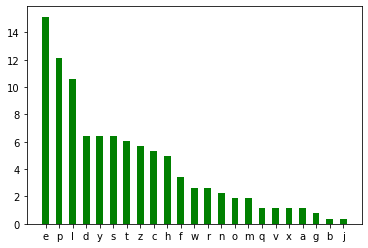

In [4]:
import matplotlib.pyplot as plt
import re


encr_trim = re.sub(r'[^\w\s]', '', encr).replace(' ', '')
char_list = list(encr_trim)

df = pd.DataFrame({'chars': char_list})
df['num'] = 1
df = df.groupby('chars').sum().sort_values('num', ascending=False) *100/ len(df)

plt.bar(df.index, df.num, width=0.5, color='g')
plt.show()

***

Using an English Frequency Table from <a href="https://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html">Cornell University website</a>, we can compare the 2 charts.

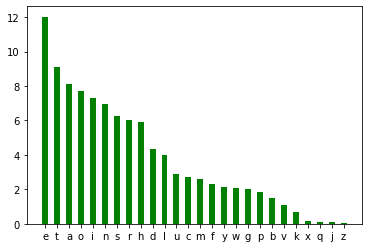

In [5]:
#scraping the frequency table
page = requests.get("https://pi.math.cornell.edu/~mec/2003-2004/cryptography/subs/frequencies.html")
soup = BeautifulSoup(page.text, "html.parser")

t = soup.find_all("td")
letters = []
freq = []
for i, elem in enumerate(t[5:]):
    if(i%5==3):
        letters.append(elem.get_text().lower())
    if(i%5==4):
        freq.append(float(elem.get_text()))
        
plt.bar(letters, freq, width=0.5, color='g')
plt.show()

***

Now the Caesar cypher is a simple one and thus it is enough to find one letter corespondence and from that we can determine the shifting value of the cypher; this will let us find the corespondence of all the other letters. 

From the English Letter Frequency chart we can see that the letter 'e' has the biggest distribution. Comparing this with the letter that has the biggest distribution from the encrypted text, we can make a sensible assumption that these 2 corespond one to another. This will enable us to find the shifting value, generate a decryption key and decypher the rest of the text back to it's original form.

<u>Note:</u> If the text sample is small, the letter 'e' might not have the biggest distribution; but it is rather safe to assume that it will still have one of the top frequencies - nonetheless, by applying the above strategy for the top letters by their distribution we should find the correct key in a couple of tries.

In [6]:
for i in range(len(df)):
    shift=ord(df.index[i])-ord('e') # finding the shifting value
    key_inv = dict(zip([ord(x) for x in numpy.roll(a, -shift)], [ord(x) for x in a])) # generating the decryption key
    decr = encr.translate(key_inv) # decrypting the encrypted text
    if(decr == text):
        print(f'Number of tries: {i+1}\n')
        break
        
print(f'Shifting value: {shift}\n\n')
print(f'Original text:\n\n{decr}')

Number of tries: 2

Shifting value: 11


Original text:

there was something special about this little creature. donna couldn't quite pinpoint what it was, but she knew with all her heart that it was true. it wasn't a matter of if she was going to try and save it, but a matter of how she was going to save it. she went back to the car to get a blanket and when she returned the creature was gone.
